# Module 2: Wrap up quiz

In [ ]:
# load dataset
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

data.head() # all numeric


,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [5]:
# q1
print(target.value_counts())

print(target.unique())

Class
not donated    570
donated        178
Name: count, dtype: int64
['donated' 'not donated']


In [12]:
# q2
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate, KFold

model = DummyClassifier(strategy="most_frequent")
cv = KFold(n_splits=10)
cv_results = cross_validate(model, data, target, cv=cv)
score = cv_results['test_score']
print(f"The average accuracy score is {score.mean():.3f}")

The average accuracy score is 0.762


In [14]:
# q2
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, KFold

model = DummyClassifier(strategy="most_frequent")
cv = KFold(n_splits=10)
scores = cross_val_score(model, data, target, cv=cv)
scores.mean()

np.float64(0.7624144144144143)

In [15]:
# q3

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, KFold

model = DummyClassifier(strategy="most_frequent")
cv = KFold(n_splits=10)
scores = cross_val_score(model, data, target, cv=cv, scoring="balanced_accuracy")
scores.mean()

np.float64(0.5)

In [ ]:
# q5
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

# select numeric columns (redunant in this case)
numerical_column_selector = selector(dtype_exclude=object)
numerical_columns = numerical_column_selector(data)

# define transformers
numerical_preprocessor = StandardScaler()

# define column transformers
preprocessor = ColumnTransformer(
    [
        ("numerical-preprocessor", numerical_preprocessor, numerical_columns)
    ]
)

# make pipeline
model = make_pipeline(preprocessor, KNeighborsClassifier())

# get number of parameters in model
model.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numerical-preprocessor', StandardScaler(),
                                    ['Recency', 'Frequency', 'Monetary', 'Time'])])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'transform_input': None,
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('numerical-preprocessor', StandardScaler(),
                                  ['Recency', 'Frequency', 'Monetary', 'Time'])]),
 'kneighborsclassifier': KNeighborsClassifier(),
 'columntransformer__force_int_remainder_cols': True,
 'columntransformer__n_jobs': None,
 'columntransformer__remainder': 'drop',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__transformer_weights': None,
 'columntransformer__transformers': [('numerical-preprocessor',
   StandardScaler(),
   ['Recency', 'Frequency', 'Monetary', 'Time'])],
 'columntransformer__verbose': False,
 'columntransformer__verbose_feature_names_out': True,
 

In [ ]:
# q6
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import cross_validate, KFold

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

# select numeric columns (redunant in this case)
numerical_column_selector = selector(dtype_exclude=object)
numerical_columns = numerical_column_selector(data)

# define transformers
numerical_preprocessor = StandardScaler()

# define column transformers
preprocessor = ColumnTransformer(
    [
        ("numerical-preprocessor", numerical_preprocessor, numerical_columns)
    ]
)

# make pipeline
model = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=1))

# evaluate using 10-fold cv
cv = KFold(n_splits=10)
cv_result = cross_validate(model, data, target, cv=cv, scoring="balanced_accuracy", return_train_score=True)
test_score = cv_result['test_score']
train_score = cv_result['train_score']

# model clearly overfits - train_score is much higher than test_score (not equal)
print(test_score.mean())
print(train_score.mean())


0.49936646973636867
0.8809857083403031


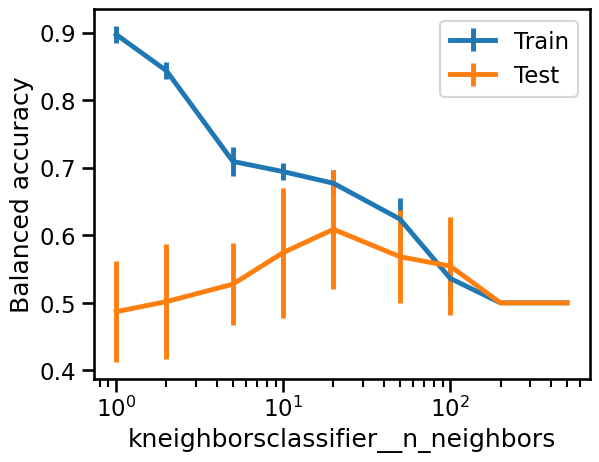

In [ ]:
# q7
import numpy as np
from sklearn.model_selection import ValidationCurveDisplay

# define n_neighbors hypereparam values to test
param_range = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500])

# plotting distribution of train & test errors to visualise overfitting vs underfitting
disp = ValidationCurveDisplay.from_estimator(
    model,
    data,
    target,
    param_name="kneighborsclassifier__n_neighbors",   # acutal name of model param found using model.get_params()
    param_range=param_range,
    cv=5,   # 5-fold cv
    scoring="balanced_accuracy",
    std_display_style="errorbar",
    n_jobs=2
)
